# **Speeding Up Inference with TensorRT**

## YOLO-V11

In [ ]:
!pip install opencv-python
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install ultralytics
!pip install onnx>=1.12.0 onnxslim>=0.1.46 onnxruntime-gpu
!pip install torch
!pip install tensorrt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import shutil

Mounted at /content/drive


In [ ]:
import os
import shutil
import glob

# Path where your engines currently live (the "fake" Drive folder)
fake_drive_dir = '/content/drive/MyDrive/JADS group assignments Semester 2/Deep Learning - Group Assignment/dev/engines'

# Destination back to the notebook root
restore_dir = '/content'

# Glob for all .engine files in the fake Drive folder
engine_paths = glob.glob(os.path.join(fake_drive_dir, '*.engine'))

if not engine_paths:
    print("No .engine files found to restore.")
else:
    for src in engine_paths:
        fname = os.path.basename(src)
        dst = os.path.join(restore_dir, fname)
        shutil.move(src, dst)
        print(f"Restored → {dst}")


Restored → /content/yolo11m_fp16_batch_16.engine
Restored → /content/yolo11m_fp16.engine
Restored → /content/yolo11m_fp32.engine
Restored → /content/yolo11m_fp16_batch_8.engine


In [ ]:
from ultralytics import YOLO
import torch
import os

engines = '/content/drive/MyDrive/JADS group assignments Semester 2/Deep Learning - Group Assignment/dev/engines'
model_yolo11m_fp32 = YOLO(engines + '/yolo11m_fp32.engine', task='detect')
model_yolo11m_fp16 = YOLO(engines + '/yolo11m_fp16.engine', task='detect')
model_yolo11m_fp16_batch_8 = YOLO(engines + '/yolo11m_fp16_batch_8.engine', task='detect')
model_yolo11m_fp16_batch_16 = YOLO(engines + '/yolo11m_fp16_batch_16.engine', task='detect')

In [ ]:
from ultralytics import YOLO
import torch
import os

devide = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(devide)


model_simple = YOLO('yolo11m.pt')

model_simple.export(format="engine", device=0, imgsz = 1280)
os.rename('/content/yolo11m.engine', '/content/yolo11m_fp32.engine')
model_yolo11m_fp32 = YOLO('/content/yolo11m_fp32.engine')

model_simple.export(format="engine", device=0, imgsz = 1280 , half=True)
os.rename('/content/yolo11m.engine', '/content/yolo11m_fp16.engine')
model_yolo11m_fp16 = YOLO('/content/yolo11m_fp16.engine')

model_simple.export(format="engine", device=0, imgsz = 1280 , half=True, batch=8)
os.rename('/content/yolo11m.engine', '/content/yolo11m_fp16_batch_8.engine')
model_yolo11m_fp16_batch_8 = YOLO('/content/yolo11m_fp16_batch_8.engine')

model_simple.export(format="engine", device=0, imgsz = 1280 , half=True, batch=16)
os.rename('/content/yolo11m.engine', '/content/yolo11m_fp16_batch_16.engine')
model_yolo11m_fp16_batch_16 = YOLO('/content/yolo11m_fp16_batch_16.engine')

model_simple.export(format="engine", device=0, imgsz = 1280 , half=True, batch=16, nms=True)
os.rename('/content/yolo11m.engine', '/content/yolo11m_fp16_batch_16_nms.engine')
model_yolo11m_fp16_batch_16 = YOLO('/content/yolo11m_fp16_batch_16_nms.engine')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
cuda


100%|██████████| 38.8M/38.8M [00:00<00:00, 123MB/s]


Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,091,712 parameters, 0 gradients, 68.0 GFLOPs

PyTorch: starting from 'yolo11m.pt' with input shape (1, 3, 1280, 1280) BCHW and output shape(s) (1, 84, 33600) (38.8 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.52...
ONNX: export success ✅ 6.2s, saved as 'yolo11m.onnx' (77.4 MB)
requirements: Ultralytics requirement ['tensorrt>7.0.0,!=10.1.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requiremen

In [ ]:
import os
import shutil
import glob

# 1) Path to your real Drive folder:
engines_dir = '/content/drive/MyDrive/JADS group assignments Semester 2/Deep Learning - Group Assignment/dev/engines'

# 2) Ensure it exists:
os.makedirs(engines_dir, exist_ok=True)

# 3) Find all .engine files in /content/
for src in glob.glob('/content/*.engine'):
    fname = os.path.basename(src)
    dst   = os.path.join(engines_dir, fname)
    # Copy (preserves original in /content/)
    shutil.copy(src, dst)
    print(f'Copied: {fname} → {engines_dir}')


Copied: yolo11m_fp16_batch_16.engine → /content/drive/MyDrive/JADS group assignments Semester 2/Deep Learning - Group Assignment/dev/engines
Copied: yolo11m_fp16.engine → /content/drive/MyDrive/JADS group assignments Semester 2/Deep Learning - Group Assignment/dev/engines
Copied: yolo11m_fp32.engine → /content/drive/MyDrive/JADS group assignments Semester 2/Deep Learning - Group Assignment/dev/engines
Copied: yolo11m_fp16_batch_8.engine → /content/drive/MyDrive/JADS group assignments Semester 2/Deep Learning - Group Assignment/dev/engines


In [ ]:
import torch

def create_dummy_images(num_images, height, width, device='cuda'):
    images = []
    for _ in range(num_images):
        # Random uint8 image in [0,255]
        img = torch.randint(
            low=0,
            high=256,
            size=(3, height, width),
            dtype=torch.float32,
            device=device
        )
        img = img.to(torch.float32) / 255.0
        images.append(img)
    return images

In [ ]:
import time

def run_inference(model, images, warmup_runs=1, device='cuda'):
    # Move model to device and set eval mode
    model = model.to(device)

    # Prepare images on GPU (unsqueeze Adds batch dim)
    imgs_gpu = [img.unsqueeze(0).to(device) for img in images]

    # Warm-up (untimed)
    for _ in range(warmup_runs):
        for img in imgs_gpu:
            with torch.no_grad():
                _ = model(img, imgsz = 1280)
        torch.cuda.synchronize()

    # Timed inference
    results, times = [], []
    for img in imgs_gpu:
        torch.cuda.synchronize()             # Wait for prior work
        start = time.time()
        with torch.no_grad():
            out = model(img, imgsz = 1280)
        torch.cuda.synchronize()             # Wait until inference completes
        results.append(out)
        times.append(time.time() - start)

    return results, times

In [ ]:
def benchmark_inference(model, num_trials=10, device='cuda'):
    avgs = []
    images = create_dummy_images(128, 1280, 1280,device=device)

    for i in range(num_trials):
        results, times = run_inference(model, images)
        avg = sum(times) / len(times)
        print(f"Trial {i+1} - Average inference time (s): {avg:.6f}")
        avgs.append(avg)

    mean_avg_time = sum(avgs) / num_trials
    print(f"Mean average inference time over {num_trials} trials (s): {mean_avg_time:.6f}")
    return mean_avg_time

In [ ]:
ms_avg = benchmark_inference(model_simple, num_trials=10)
# Mean average inference time over 10 trials (s): 0.095437

Streaming output truncated to the last 5000 lines.

0: 1280x1280 (no detections), 89.2ms
Speed: 0.0ms preprocess, 89.2ms inference, 2.8ms postprocess per image at shape (1, 3, 1280, 1280)

0: 1280x1280 (no detections), 88.9ms
Speed: 0.0ms preprocess, 88.9ms inference, 3.0ms postprocess per image at shape (1, 3, 1280, 1280)

0: 1280x1280 (no detections), 87.3ms
Speed: 0.0ms preprocess, 87.3ms inference, 2.9ms postprocess per image at shape (1, 3, 1280, 1280)

0: 1280x1280 (no detections), 91.4ms
Speed: 0.0ms preprocess, 91.4ms inference, 3.1ms postprocess per image at shape (1, 3, 1280, 1280)

0: 1280x1280 (no detections), 89.7ms
Speed: 0.0ms preprocess, 89.7ms inference, 2.9ms postprocess per image at shape (1, 3, 1280, 1280)

0: 1280x1280 (no detections), 89.8ms
Speed: 0.0ms preprocess, 89.8ms inference, 3.1ms postprocess per image at shape (1, 3, 1280, 1280)

0: 1280x1280 (no detections), 89.5ms
Speed: 0.0ms preprocess, 89.5ms inference, 3.2ms postprocess per image at shape (1, 3, 12

In [ ]:
ms_fp32_avg = benchmark_inference(model_yolo11m_fp32, num_trials=10)

TypeError: model='/content/drive/MyDrive/JADS group assignments Semester 2/Deep Learning - Group Assignment/dev/engines/yolo11m_fp32.engine' should be a *.pt PyTorch model to run this method, but is a different format. PyTorch models can train, val, predict and export, i.e. 'model.train(data=...)', but exported formats like ONNX, TensorRT etc. only support 'predict' and 'val' modes, i.e. 'yolo predict model=yolo11n.onnx'.
To run CUDA or MPS inference please pass the device argument directly in your inference command, i.e. 'model.predict(source=..., device=0)'

In [ ]:
import time
from ultralytics import YOLO

def run_inference_unified(model, images, warmup_runs=3, device='cuda'):
    """
    Runs warm-up + timed inference on either a PyTorch or an exported/engine YOLO model.
    Returns (results, times) lists.
    """
    # Detect if this is an exported format (has .predict) but not a torch.nn.Module
    is_engine = hasattr(model, 'predict') and not hasattr(model.model, 'forward')
    # Prepare model and images
    if not is_engine:
        # PyTorch model: move to GPU and add batch dim
        model = model.to(device).eval()
        imgs = [img.unsqueeze(0).to(device) for img in images]
    else:
        # Engine model: .predict will handle device internally, keep images as CPU tensors
        imgs = images

    # Warm-up (no timing)
    for _ in range(warmup_runs):
        if is_engine:
            _ = model.predict(imgs, imgsz=1280, device=0, verbose=False)
        else:
            for img in imgs:
                with torch.no_grad():
                    _ = model(img, imgsz=1280)
            torch.cuda.synchronize()

    # Timed inference
    results, times = [], []
    for img in imgs:
        if not is_engine:
            torch.cuda.synchronize()
        start = time.time()
        if is_engine:
            out = model.predict(img, imgsz=1280, device=0, verbose=False)
        else:
            with torch.no_grad():
                out = model(img, imgsz=1280)
            torch.cuda.synchronize()
        times.append(time.time() - start)
        results.append(out)

    return results, times

def benchmark_inference(model, num_trials=10, device='cuda'):
    """
    Benchmarks average per-image inference time over `num_trials`.
    """
    avgs = []
    # create_dummy_images should give you a list of CPU tensors; here as example:
    images = [create_dummy_images(1, 1280, 1280, device='cpu')[0] for _ in range(5)]
    for i in range(num_trials):
        _, times = run_inference_unified(model, images, warmup_runs=3, device=device)
        avg = sum(times) / len(times)
        print(f"Trial {i+1:2d} → avg = {avg*1000:.2f} ms/image")
        avgs.append(avg)
    overall = sum(avgs) / len(avgs)
    print(f"\nMean over {num_trials} trials → {overall*1000:.2f} ms/image")
    return overall

# Example usage:
model_engine = YOLO('/content/yolo11m_fp32.engine', task='detect')
mean_time = benchmark_inference(model_engine, num_trials=10)


Loading /content/yolo11m_fp32.engine for TensorRT inference...


TypeError: type Tensor is not a supported Ultralytics prediction source type. 
See https://docs.ultralytics.com/modes/predict for supported source types.

In [ ]:
!pip install torch2trt

ERROR: Could not find a version that satisfies the requirement torch2trt (from versions: none)
ERROR: No matching distribution found for torch2trt


In [ ]:
import torch, time
from torch2trt import TRTModule

# 1) Load your TensorRT engine
model_trt = TRTModule()
model_trt.load_state_dict(torch.load(engines + '/yolo11m_fp32.engine'))
model_trt.eval().to('cuda')

# 2) Prepare your dummy images
images = create_dummy_images(128, 1280, 1280, device='cuda')

# 3) Warm-up
with torch.no_grad():
    for _ in range(2):
        for img in images:
            _ = model_trt(img)

# 4) Timed loop
times = []
with torch.no_grad():
    for img in images:
        torch.cuda.synchronize()
        t0 = time.time()
        _ = model_trt(img)
        torch.cuda.synchronize()
        times.append(time.time() - t0)

avg_inference = sum(times) / len(times)
print(f"TensorRT YOLO-11M avg inference: {avg_inference*1000:.2f} ms")


ModuleNotFoundError: No module named 'torch2trt'

In [ ]:
import time, torch
from ultralytics import YOLO

def create_dummy_cpu(num, h, w):
    return [torch.randint(0,256,(3,h,w),dtype=torch.uint8) for _ in range(num)]

def benchmark(path, batch_size=16, trials=10, warmups=3, h=1280, w=1280, device=0, task='detect'):
    # Load and prep model
    model = YOLO(path, task=task)
    model.to(f'cuda:{device}').eval()
    torch.cuda.empty_cache()
    # Prepare inputs on CPU
    imgs = create_dummy_cpu(batch_size, h, w)
    imgs_np = [img.permute(1,2,0).numpy() for img in imgs]
    # Choose runner
    engine = not isinstance(model.model, torch.nn.Module)
    runner = (lambda _: model.predict(source=imgs_np, imgsz=h, device=device, verbose=False)) if engine \
             else (lambda _: model(torch.stack([img.to(f'cuda:{device}') for img in imgs]), imgsz=h))
    # Warm-up
    for _ in range(warmups):
        runner(None)
        torch.cuda.synchronize(device)
    # Benchmark
    times = []
    for _ in range(trials):
        torch.cuda.synchronize(device)
        t0 = time.time()
        runner(None)
        torch.cuda.synchronize(device)
        times.append((time.time() - t0)/batch_size)
    avg = sum(times)/len(times)
    print(f"Mean latency: {avg:.4f} s/image")
    return avg

# Example usage:
ms = benchmark('/content/yolo11m_fp32.engine', batch_size=16, trials=10, device=0)


TypeError: model='/content/yolo11m_fp32.engine' should be a *.pt PyTorch model to run this method, but is a different format. PyTorch models can train, val, predict and export, i.e. 'model.train(data=...)', but exported formats like ONNX, TensorRT etc. only support 'predict' and 'val' modes, i.e. 'yolo predict model=yolo11n.onnx'.
To run CUDA or MPS inference please pass the device argument directly in your inference command, i.e. 'model.predict(source=..., device=0)'

In [ ]:
import time

def run_inference_in_batches(model, images, batch_size=8):
    times = []
    results = []


    for i in range(0, len(images), batch_size):
        batch_images = images[i:i + batch_size]

        # Stack images to create a batch tensor
        batch = torch.stack(batch_images).to('cuda')

        start = time.time()
        with torch.no_grad():
            result = model(batch, imgsz=1280)

        results.append(result)
        times.append(time.time() - start)

    return results, times


def run_inference_in_batches_timed(model, images, batch_size=8):
    """
    Runs inference in batches and returns per-batch results and timings (in seconds),
    using torch.cuda.synchronize() to get pure GPU timing.
    """
    # 1) Move model to device and set eval mode
    #model = model.to(device).eval()
    results = []
    times = []

    for i in range(0, len(images), batch_size):
        batch_images = images[i:i + batch_size]

        # Stack images to create a batch tensor
        batch = torch.stack(batch_images).to('cuda')

        # 3) Synchronize before timing to clear any pending work
        torch.cuda.synchronize()

        # 4) Start timer, run inference, then sync and stop timer
        start = time.time()
        with torch.no_grad():
            out = model(batch, imgsz=1280)
        torch.cuda.synchronize()
        end = time.time()

        results.append(out)
        times.append(end - start)  # seconds

    return results, times


In [ ]:
BATCH_SIZE = 16
NUM_TRIALS = 20
avgs = []
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#images = create_dummy_images(128, 1280,1280,device=device)

model_yolo11m_fp16_batch_16 = YOLO(engines + '/yolo11m_fp16_batch_16.engine', task='detect')

print(f"TensorRT optimized - Batched {BATCH_SIZE}")
for i in range(NUM_TRIALS):
    batched_results, batched_time = run_inference_in_batches_timed(model_yolo11m_fp16_batch_16, images, batch_size=BATCH_SIZE)
    avg = sum(batched_time) / len(images)
    print("Average inference time (s):", avg)
    avgs.append(avg)

batched_mat = sum(avgs) / NUM_TRIALS
print("Mean average inference time (s):", batched_mat)



# Mean average inference time (s): 0.023000966664403676

TensorRT optimized - Batched 16
Loading /content/drive/MyDrive/JADS group assignments Semester 2/Deep Learning - Group Assignment/dev/engines/yolo11m_fp16_batch_16.engine for TensorRT inference...

0: 1280x1280 (no detections), 17.4ms
1: 1280x1280 (no detections), 17.4ms
2: 1280x1280 (no detections), 17.4ms
3: 1280x1280 (no detections), 17.4ms
4: 1280x1280 (no detections), 17.4ms
5: 1280x1280 (no detections), 17.4ms
6: 1280x1280 (no detections), 17.4ms
7: 1280x1280 (no detections), 17.4ms
8: 1280x1280 (no detections), 17.4ms
9: 1280x1280 (no detections), 17.4ms
10: 1280x1280 (no detections), 17.4ms
11: 1280x1280 (no detections), 17.4ms
12: 1280x1280 (no detections), 17.4ms
13: 1280x1280 (no detections), 17.4ms
14: 1280x1280 (no detections), 17.4ms
15: 1280x1280 (no detections), 17.4ms
Speed: 0.0ms preprocess, 17.4ms inference, 4.2ms postprocess per image at shape (1, 3, 1280, 1280)

0: 1280x1280 (no detections), 16.8ms
1: 1280x1280 (no detections), 16.8ms
2: 1280x1280 (no detections), 

In [ ]:
%reset -f


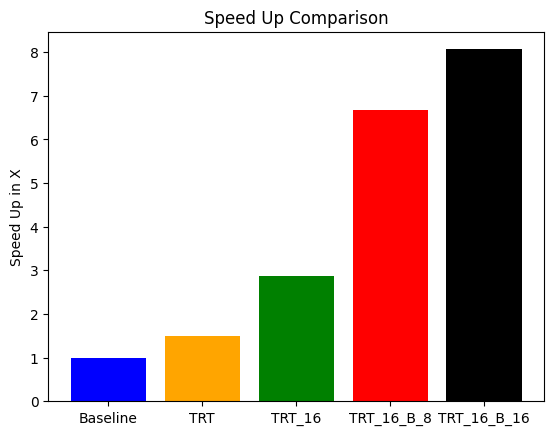

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

mat = 0.02221997771412134
trt_engine = 0.014942
trt_engine_float_16 = 0.007755
trt_engine_float_16_batch_8 = 0.003330722451210022
trt_engine_float_16_batch_16 = 0.0027555114589631557


speed_up_values = [1, mat / trt_engine, mat / trt_engine_float_16, mat / trt_engine_float_16_batch_8, mat / trt_engine_float_16_batch_16]
labels = ['Baseline', 'TRT', 'TRT_16', 'TRT_16_B_8', 'TRT_16_B_16']

plt.bar(labels, speed_up_values, color=['blue', 'orange', 'green', 'red', 'black'])

# Adding labels and title
plt.ylabel('Speed Up in X')
plt.title('Speed Up Comparison')

# Display the plot
plt.show()

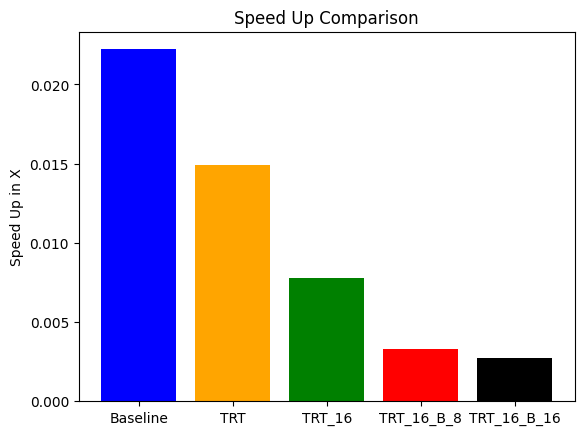

In [ ]:
mat = 0.02221997771412134
trt_engine = 0.014942
trt_engine_float_16 = 0.007755
trt_engine_float_16_batch_8 = 0.003330722451210022
trt_engine_float_16_batch_16 = 0.0027555114589631557


speed_up_values = [mat, trt_engine, trt_engine_float_16, trt_engine_float_16_batch_8, trt_engine_float_16_batch_16]

plt.bar(labels, speed_up_values, color=['blue', 'orange', 'green', 'red', 'black'])

# Adding labels and title
plt.ylabel('Speed Up in X')
plt.title('Speed Up Comparison')

# Display the plot
plt.show()

In [ ]:
from ultralytics import YOLO
import torch
import os

model_simple_medium = YOLO('yolov8m.pt')
model_simple_medium.export(format="engine", device=0, imgsz = 1280, half=True, batch=16)  # Exports to 'yolo11s_fp16.engine'
os.rename('/content/yolo11m.engine', '/content/yolo11m_fp16_batch_16.engine')
model_yolo11m_fp16_batch_16 = YOLO('/content/yolo11m_fp16_batch_16.engine')

Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m summary (fused): 92 layers, 25,886,080 parameters, 0 gradients, 78.9 GFLOPs

PyTorch: starting from 'yolov8m.pt' with input shape (16, 3, 1280, 1280) BCHW and output shape(s) (16, 84, 33600) (49.7 MB)

ONNX: starting export with onnx 1.17.0 opset 19...


KeyboardInterrupt: 

In [ ]:
BATCH_SIZE = 16
NUM_TRIALS = 20
avgs = []
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
images = create_dummy_images(num_images=128, height=1280, width=1280, device=device)

model_yolo11s_fp16_batch_16 = YOLO('/content/yolo11m_fp16_batch_16.engine', task='detect')


print(f"TensorRT optimized - Batched {BATCH_SIZE}")
for i in range(NUM_TRIALS):
    batched_results, batched_time = run_inference_in_batches(model_yolo11s_fp16_batch_16, images, batch_size=BATCH_SIZE)
    avg = sum(batched_time) / len(images)
    print("Average inference time (s):", avg)
    avgs.append(avg)

batched_mat = sum(avgs) / NUM_TRIALS
print("Mean average inference time (s):", batched_mat)

TensorRT optimized - Batched 16
Loading /content/yolo11m_fp16_batch_16.engine for TensorRT inference...
ERROR ❌ TensorRT model exported with a different version than 10.10.0.31



AttributeError: 'NoneType' object has no attribute 'create_execution_context'